# 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까?
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    heart_failure_clinical_records_dataset.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


## 최종 목표
    - 의료 데이터와 그 분석에 대한 이해
    - Colab 및 Pandas 라이브러리 사용법 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Classification 모델의 학습과 평가 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 의료 데이터셋에 대하여

### 의료 데이터의 수집


### 의료 데이터 분석의 현재


### confusion matrics
- Accuracy
- Precision(정밀도) : True 예측 시 옳을(맞을) 확률
- Recall(재현률) : 실제 True 중 얼마나 맞추었냐?

-> 의료 데이터에서는 Recall이 중요!

## Step 1. 데이터셋 준비하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [ ]:
import os

In [ ]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기 (환경변수 세팅)

os.environ['KAGGLE_USERNAME'] = 'chlyuna'
os.environ['KAGGLE_KEY'] = ''

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

!kaggle datasets download -d andrewmvd/heart-failure-clinical-data
!unzip '*.zip'

heart-failure-clinical-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


In [ ]:
!ls

drive				 heart_failure_clinical_records_dataset.csv
heart-failure-clinical-data.zip  sample_data


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [ ]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [ ]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# 결측치 없음, dtype이 int, float임을 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


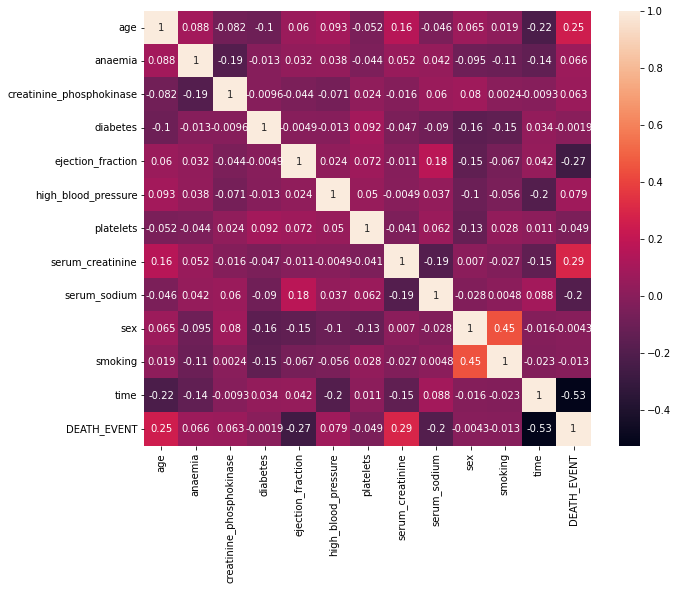

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

### 문제 5. 수치형 데이터의 히스토그램 그리기


In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

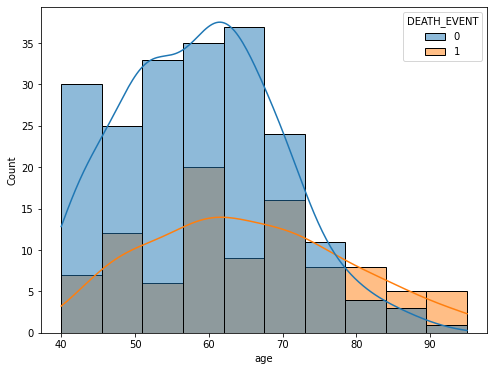

In [ ]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기

plt.figure(figsize=(8,6))
sns.histplot(data=df, x='age', hue='DEATH_EVENT', kde=True)
plt.show()

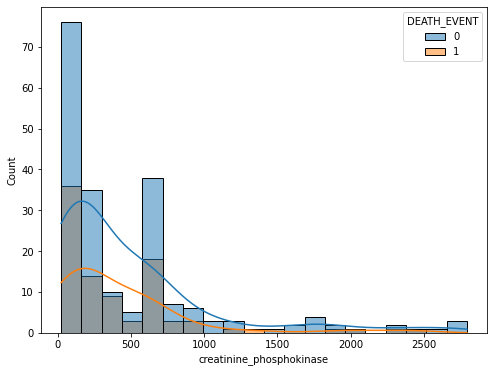

In [ ]:
# outlier 확인
plt.figure(figsize=(8,6))
sns.histplot(data=df.loc[df.creatinine_phosphokinase < 3000, :], x='creatinine_phosphokinase', hue='DEATH_EVENT', kde = True)
plt.show()

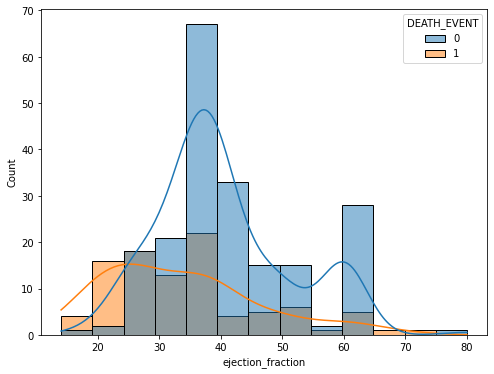

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='ejection_fraction', bins = 13, hue='DEATH_EVENT', kde = True)
plt.show()

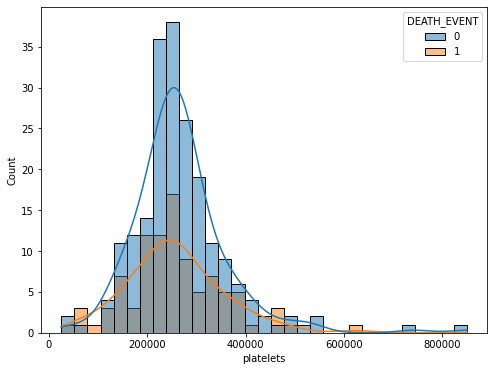

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='platelets', hue='DEATH_EVENT', kde = True)
plt.show()

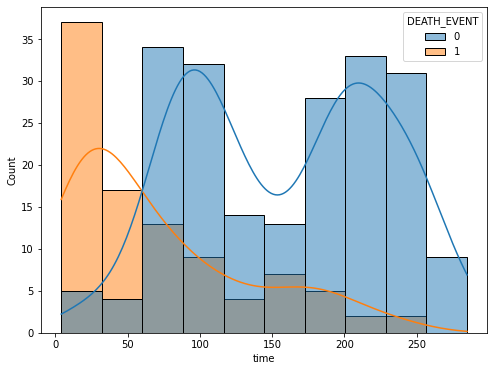

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='time', hue='DEATH_EVENT', kde=True)
plt.show()

<Figure size 576x432 with 0 Axes>

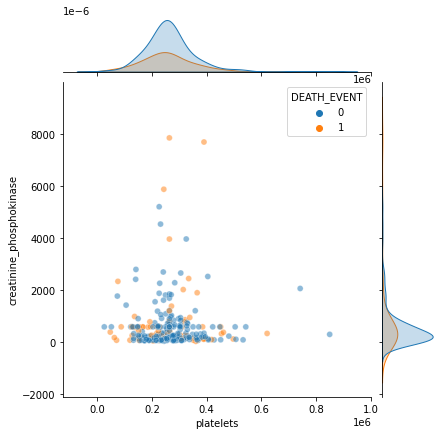

In [ ]:
plt.figure(figsize=(8,6))
sns.jointplot(data=df, x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', alpha = 0.5)
plt.show()

<Figure size 576x432 with 0 Axes>

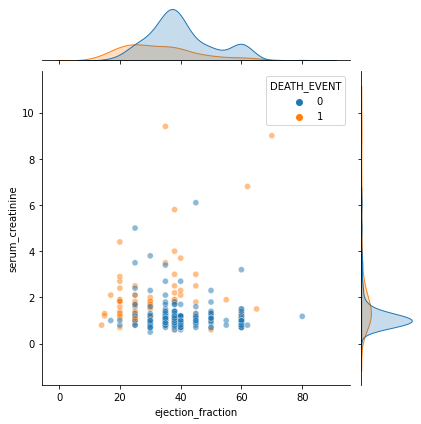

In [ ]:
plt.figure(figsize=(8,6))
sns.jointplot(data=df, x='ejection_fraction', y='serum_creatinine', hue='DEATH_EVENT', alpha = 0.5)
plt.show()

### 문제 6. Boxplot 계열을 이용하여 범주별 통계 확인하기


In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

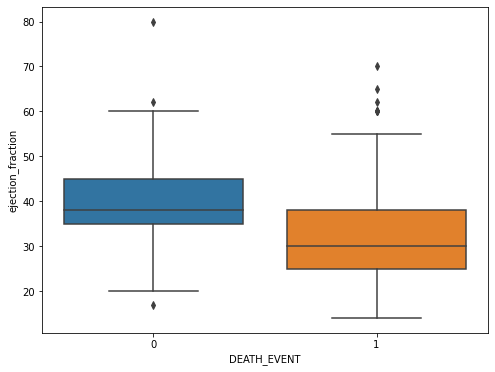

In [ ]:
# seaborn의 Boxplot 계열(boxplot(), violinplot(), swarmplot())을 사용
# Hint) hue 키워드를 사용하여 범주 세분화 가능

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='DEATH_EVENT', y='ejection_fraction')
plt.show()

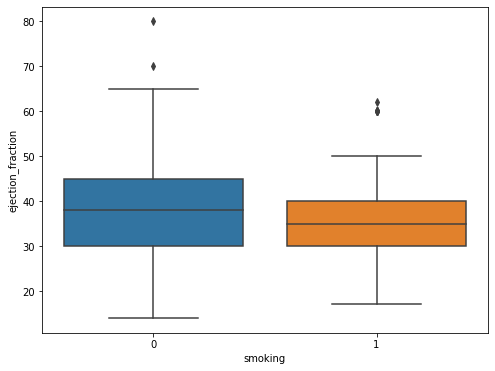

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='smoking', y='ejection_fraction')
plt.show()

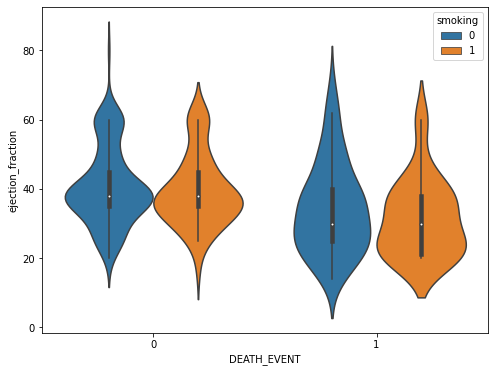

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='DEATH_EVENT', y='ejection_fraction', hue='smoking')
plt.show()

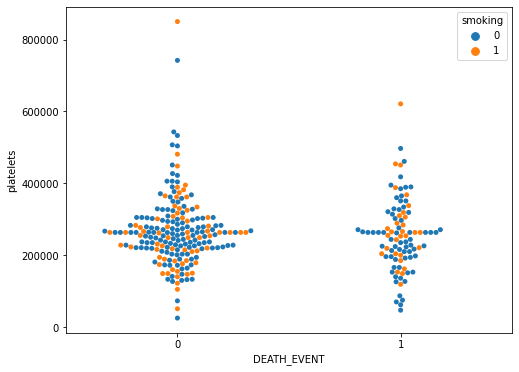

In [ ]:
# scatterplot + violinplot 합친 형태
plt.figure(figsize=(8,6))
sns.swarmplot(data=df, x='DEATH_EVENT', y='platelets', hue = 'smoking')
plt.show()

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 7. StandardScaler를 이용하여 데이터 전처리하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia','diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

In [ ]:
X_num.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116


In [ ]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num) # numpy array 형태
X_scaled = pd.DataFrame(data=X_scaled, index = X_num.index, columns = X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)

In [ ]:
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0


### 문제 8. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((209, 11), (90, 11), (209,), (90,))

## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

### 문제 10. 모델 학습 결과 평가하기


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



### 문제 11. XGBoost 모델 생성/학습하기


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier()

### 문제 12. 모델 학습 결과 평가하기


In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        64
           1       0.68      0.58      0.62        26

    accuracy                           0.80        90
   macro avg       0.76      0.73      0.74        90
weighted avg       0.79      0.80      0.79        90



### 문제 13. 특징의 중요도 확인하기


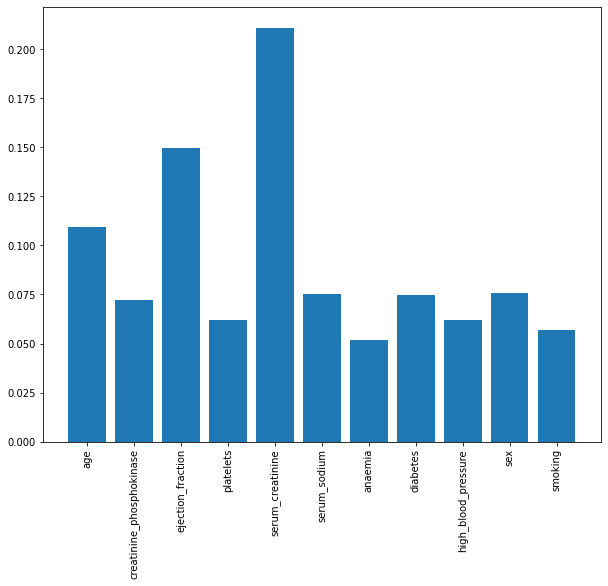

In [ ]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot

plt.figure(figsize=(10,8))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Precision-Recall 커브 확인하기

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


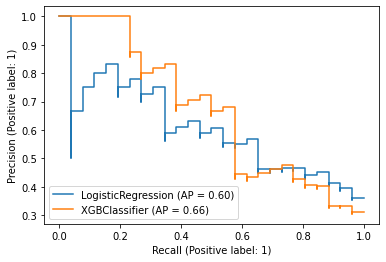

In [ ]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)

fig = plt.figure()
ax = fig.gca()
plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)

# AP가 1에 가까울수록 좋음

### 문제 15. ROC 커브 확인하기

In [ ]:
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


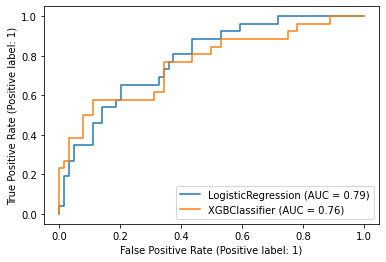

In [ ]:
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)

fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)
plot_roc_curve(model_xgb, X_test, y_test, ax=ax)
# AUC, Area Under the Coure : ROC 곡선 아래 영역
# AUC가 높다는 것은 클래스를 구별하는 모델의 성능이 훌륭하다는 것을 의미